# LINEAR REGRESSION

In [59]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv("C:\\Users\\nex20\\Downloads\\bostonhouseprice\\boston\\boston.csv")

In [61]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# data analysis 

In [62]:
df.shape

(506, 14)

In [63]:
df.size

7084

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [65]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [66]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [67]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [68]:
correlation = df.corr()

In [69]:
correlation 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

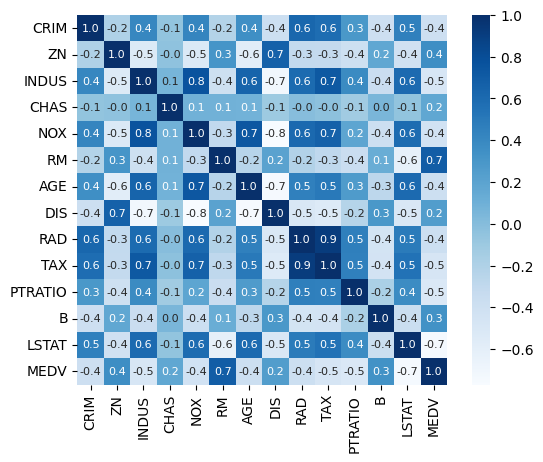

In [70]:
sns.heatmap(data = correlation ,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### independent and dependent features 

In [71]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [72]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [73]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# TRAIN TEST SPLIT 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [75]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80


In [76]:
y_train

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 354, dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [78]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

<Axes: ylabel='Density'>

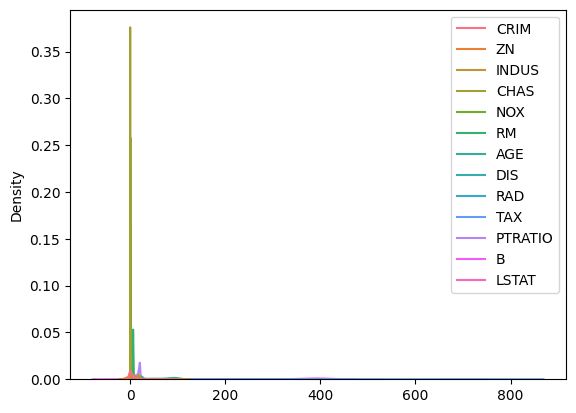

In [79]:
sns.kdeplot(data = X_train)

<Axes: ylabel='Density'>

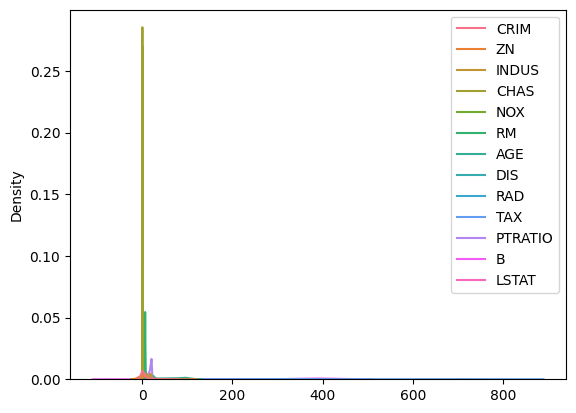

In [80]:
sns.kdeplot(data = X_test)

<Axes: ylabel='Density'>

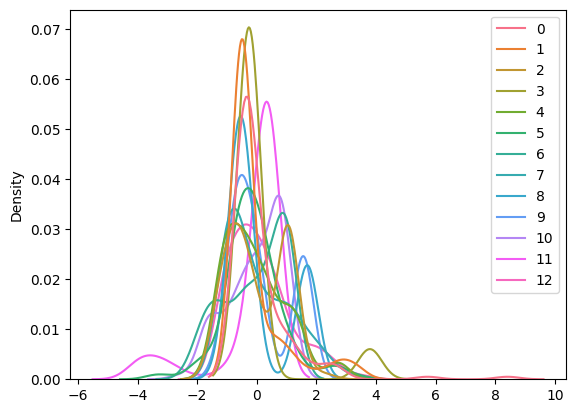

In [81]:
sns.kdeplot(data = X_test_s)

<Axes: ylabel='Density'>

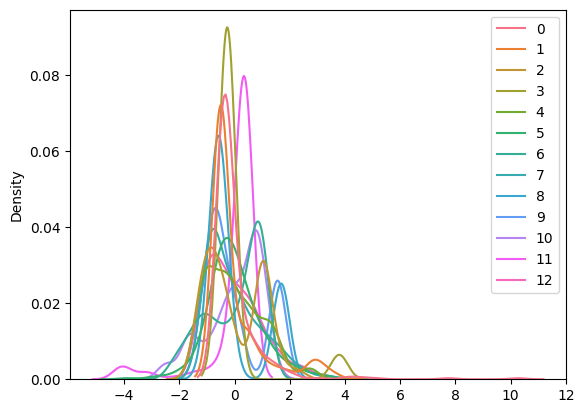

In [82]:
sns.kdeplot(data = X_train_s)

<Axes: xlabel='MEDV', ylabel='Density'>

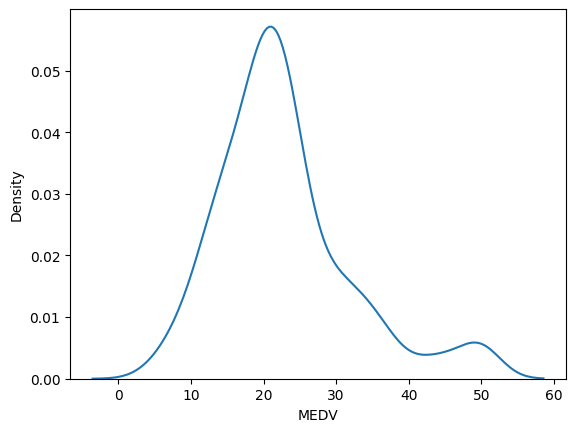

In [83]:
sns.kdeplot(data = y_train)

In [84]:
X_train_s

array([[-0.20735619, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.42454294,  3.10807269],
       [-0.38886492,  0.34677427, -0.58974728, ...,  0.05696346,
         0.40185312, -0.66643035],
       [-0.33573486, -0.49997924,  1.54801583, ...,  1.2272573 ,
         0.39846135,  0.63936662],
       ...,
       [-0.38450355, -0.49997924, -0.15303077, ..., -0.30312696,
         0.39659002, -0.30284441],
       [-0.37511786, -0.49997924, -0.59690657, ..., -0.25811566,
         0.37588849,  0.89967717],
       [-0.38592298, -0.49997924, -1.00641779, ..., -0.84326258,
         0.42454294,  0.31822262]])

In [90]:
scaler.inverse_transform(X_train_s) # for positive values


array([[1.69434490e+01, 1.18093220e+01, 1.63957109e+02, ...,
        6.55727286e+01, 3.42959181e+04, 2.55667053e+02],
       [4.31421066e+00, 4.84201813e+02, 5.96869492e+01, ...,
        5.97964015e+01, 3.41300463e+04, 6.70800016e+01],
       [8.01095966e+00, 1.18093220e+01, 1.63957109e+02, ...,
        6.55727286e+01, 3.41052510e+04, 1.32322074e+02],
       ...,
       [4.61767140e+00, 1.18093220e+01, 8.09879530e+01, ...,
        5.80190701e+01, 3.40915709e+04, 8.52459957e+01],
       [5.27072090e+00, 1.18093220e+01, 5.93377524e+01, ...,
        5.82412366e+01, 3.39402342e+04, 1.45328077e+02],
       [4.51890902e+00, 1.18093220e+01, 3.93636965e+01, ...,
        5.53530730e+01, 3.42959181e+04, 1.16276624e+02]])

In [89]:
scaler.inverse_transform(X_test_s) # for positive values

array([[3.91916117e+00, 1.18093220e+01, 3.37067086e+01, ...,
        5.60195723e+01, 3.24414030e+04, 6.43232944e+01],
       [8.03687446e+01, 1.18093220e+01, 1.37487992e+02, ...,
        6.33510643e+01, 3.16667646e+04, 7.98032660e+01],
       [4.31129117e+00, 1.18093220e+01, 1.08085623e+02, ...,
        5.49087402e+01, 3.40257352e+04, 8.66596918e+01],
       ...,
       [1.43592512e+02, 1.18093220e+01, 1.37487992e+02, ...,
        6.33510643e+01, 3.42959181e+04, 2.30220525e+02],
       [7.47043587e+00, 1.18093220e+01, 8.02197200e+01, ...,
        5.93520687e+01, 3.42959181e+04, 4.45315498e+01],
       [3.60727561e+00, 1.18093220e+01, 2.63037368e+01, ...,
        6.00185680e+01, 3.40582255e+04, 4.92674315e+01]])

# cross validation

In [102]:
linreg = LinearRegression()
linreg.fit(X_train_s , y_train)

LinearRegression()

In [96]:
from sklearn.model_selection import cross_val_score 
cvs = cross_val_score(linreg , X_train_s , y_train , scoring = 'neg_mean_squared_error', cv= 5)

In [97]:
cvs

array([-19.79365545, -24.23948355, -18.56090276, -34.6349599 ,
       -17.77593014])

In [99]:
# mean squared error 
mse = cvs.mean()

In [100]:
mse

-23.00098636190928

In [106]:
y_pred = linreg.predict(X_test)
y_pred

C:\Users\nex20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [104]:
linreg.predict(X_train_s)

array([ 4.58009023, 28.38354012, 17.27775551, 29.39070404, 20.54476971,
       15.75754584, 17.6247808 , 12.49442278,  9.22920189, 18.99918727,
       34.41440638, 32.93511107, 23.12483827, 19.46710569, 22.74964337,
       26.62358085, 21.76687195, 16.99819925, 31.96065524, 10.83525249,
       19.40870301, 32.61288955, 18.95461969, 15.98186378, 18.61712222,
       14.38842624, 24.83097587, 23.82401975, 16.76826477, 13.84580415,
       20.0779166 , 24.92266767, 17.16189624, 24.8364039 , 22.24174572,
       27.56012394, 35.90604682, 17.04440455, 12.33400373, 34.74493343,
       30.90136127, 20.49045946, 39.64478915, 29.13249385, 29.01388038,
       17.54994965, 26.93066272, 40.12543441, 28.81755964, 16.66961044,
       37.3921316 , 35.14109319, 13.69652069, 29.0202751 , 21.51233536,
       24.20704328, 21.46319361, 23.80022518, 27.71918267, 29.6616371 ,
       14.66010846, 25.7422347 , 23.1487446 , 13.27417646, 13.9336657 ,
       25.4021242 , 19.33272476, 30.47117826, 11.02963187, 23.62

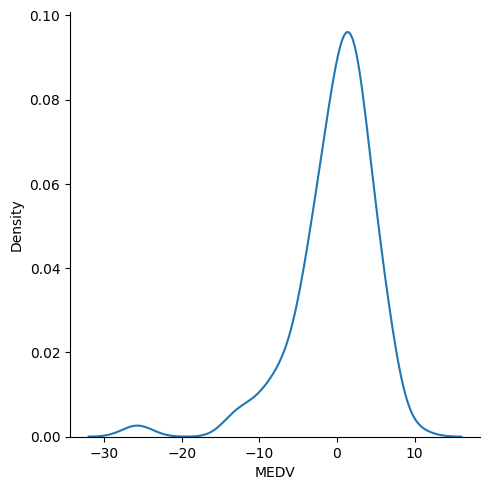

In [110]:
sns.displot(y_pred-y_test , kind = 'kde')

<Axes: xlabel='MEDV', ylabel='Density'>

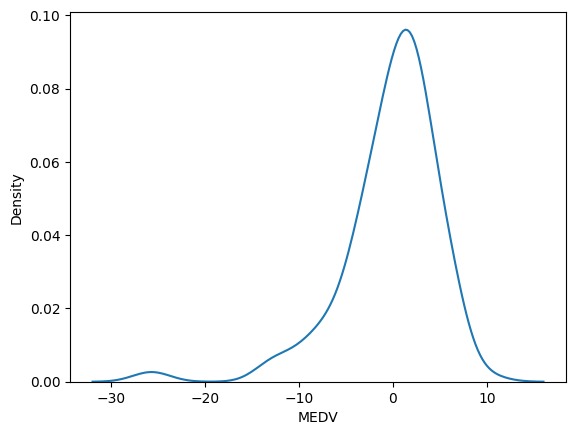

In [112]:
sns.kdeplot(y_pred-y_test)

# variance is very low -10 to 10 ( which is very good)

# finding the metrics 

In [126]:
from sklearn.metrics import  mean_absolute_error,r2_score , mean_absolute_percentage_error ,max_error

In [123]:
mean_absolute_error(y_pred , y_test)

3.60990406038182

In [124]:
r2_score(y_pred , y_test)

0.5291006947760517

In [125]:
mean_absolute_percentage_error(y_pred , y_test)

0.3884385683288008

In [127]:
max_error(y_pred , y_test)

26.248368359251813

## adjusted r^2 

In [128]:
def my_r2_score(y_true, y_hat):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    scikit_r2 = r2_score(y_true, y_hat)
    
    print(f'R-squared (SS_explained / SS_Total) = {ss_explained / ss_total}\n' + \
          f'R-squared (1 - (SS_residual / SS_Total)) = {1 - (ss_residual / ss_total)}\n'+ \
          f"Scikit-Learn's R-squared = {scikit_r2}")

print('Positive R-squared\n')
my_r2_score(y_test, y_pred)

Positive R-squared

R-squared (SS_explained / SS_Total) = 0.6943823973138964
R-squared (1 - (SS_residual / SS_Total)) = 0.6733825506400184
Scikit-Learn's R-squared = 0.6733825506400184
